# 신경망 생성
- `torch.nn` 패키지 사용

- `nn.Module`을 상속받고, 해당 모듈은 계층과 `output`을 반환하는 `forward`메소드를 포함

- 파이토치에서 신경망 생성을 위한 기본 틀

      1. class Net(nn.Module):

           def __init__(self):
               super(Net, self).__init__()

      2. class MyModel(nn.Module):

            def __init__(self):
                super(MyModel, self).__init__()

- `conv2d` 레이어를 쌓을 때, 필터의 갯수를 계산하고 `in_channels`에 넣어줘야함

        

## 신경망 정의

In [108]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [109]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3)
    self.fc1 = nn.Linear(in_features=16*6*6, out_features=120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10) # final output is 10
  
  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x)) # flatten
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_feature(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    
    return num_features
  
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


# 선형회귀(Linear Regression) 모델 생성
- 코드 출처 : https://yceffort.kr/2019/02/19/pytorch-02-linear-regression/

## modules import

In [110]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

## 데이터 생성 및 회귀식 설정

X.shape: torch.Size([100, 1])
y.shape: torch.Size([100, 1])


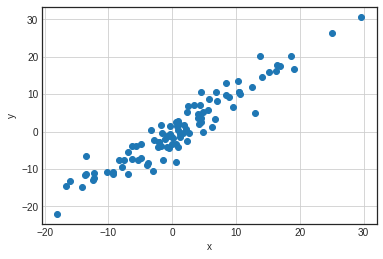

In [111]:
X = torch.randn(100, 1) * 10
y = X + 3 * torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)
print('X.shape:', X.shape)
print('y.shape:', y.shape)

## 신경망 구성

In [112]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
  
    self.linear = nn.Linear(1, 1)
  
  def forward(self, x):
    pred = self.linear(x)
    return pred

## 모델 생성 및 파라미터 확인

In [113]:
torch.manual_seed(111)

model = LinearRegressionModel()
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [114]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.4311]], requires_grad=True), Parameter containing:
tensor([0.8280], requires_grad=True)]


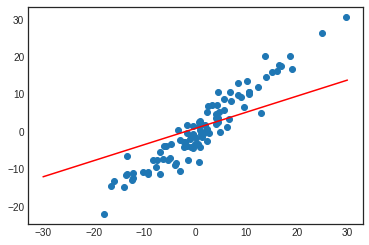

In [115]:
w, b = model.parameters()
def get_params():
  return w[0][0].item(), b[0].item() # 파라미터 직접 접근 불가, item()함수를 통해서 가져와야함

def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1 * x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

plot_fit("Initial Model") # 학습되기전 초창기 모델

## 손실함수와 옵티마이저

In [116]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

## 모델 학습

In [117]:
epochs = 100
losses = []

for epoch in range(epochs):
  '''
  한번의 학습이 완료되어지면(즉, Iteration이 한번 끝나면) gradients를 항상 0으로 만들어 주어야 합니다. 
  만약 gradients를 0으로 초기화해주지 않으면 gradient가 의도한 방향이랑 다른 방향을 가르켜 학습이 원하는 방향으로 이루어 지지 않습니다.
  '''
  optimizer.zero_grad() # "Pytorch에서는 gradients값들을 추후에 backward를 해줄때 계속 더해주기 때문" 사용
  
  y_pred = model(X)
  loss = criterion(y_pred, y)
  losses.append(loss)
  loss.backward() # backpropagation

  optimizer.step() # Optimizer update

  if epoch % 10 == 0:
    print('Epoch: {:3d}\tloss: {:.4f}'.format(epoch+1, loss))

Epoch:   1	loss: 36.3378
Epoch:  11	loss: 10.8853
Epoch:  21	loss: 10.0915
Epoch:  31	loss: 10.0150
Epoch:  41	loss: 9.9613
Epoch:  51	loss: 9.9103
Epoch:  61	loss: 9.8612
Epoch:  71	loss: 9.8141
Epoch:  81	loss: 9.7687
Epoch:  91	loss: 9.7251


## 시각화

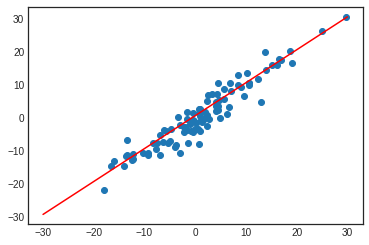

In [118]:
plot_fit("Trained Model")

# 다층 퍼셉트론

* 중간층(은닉층)을 여러개로 늘린 것을 심층 신경망(DNN)이라고 한다.
* 신경망과 심층 신경망 모두 퍼셉트론을 여러개 조합해서 구성한 것으로, 다층 퍼셉트론(Multilayer perceptron, MLP)라고 한다.
* 순전파와 역전파를 반복해서 학습이 이뤄지며 모형을 생성한다. 
* 사전 학습 알고리즘으로는 Autoencoder가 유명함

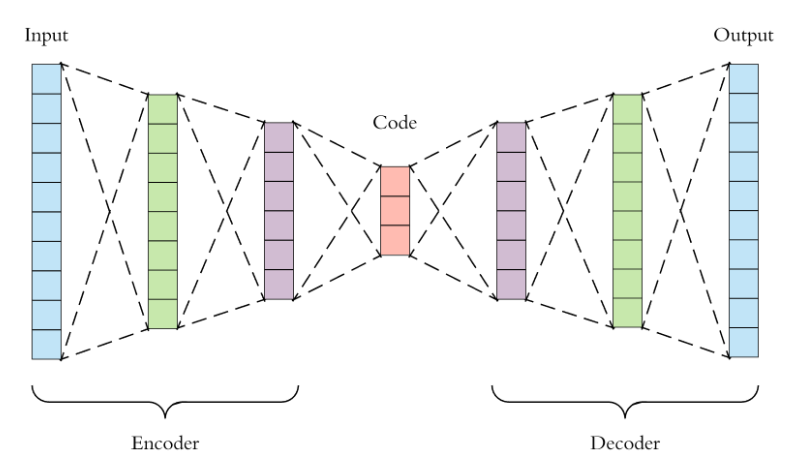


# Autoencoder
* 입력층과 출력층의 노드수가 같은 것이 특징
* 비지도학습, 차원축소에 쓰이는 알고리즘이므로 설명변수만으로 구성되어 있음
* 입력층과 중간층에서 정보 압축(encoding)이 일어나고, 중간층과 출력층 사이에서 복호화(decoding)이 일어난다.
* Autoencoder를 이용하여 다층 퍼셉트론을 한층씩 쌓아 올릴 수 있다.

# 와인 분류하기
* 다층 퍼셉트론으로 와인 분석

In [119]:
%pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

import pandas as pd

In [121]:
wine = load_wine()
print(wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [122]:
'''
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
        - 1) Alcohol
        - 2) Malic acid
        - 3) Ash
        - 4) Alcalinity of ash  
        - 5) Magnesium
        - 6) Total phenols
        - 7) Flavanoids
        - 8) Nonflavanoid phenols
        - 9) Proanthocyanins
        - 10)Color intensity
        - 11)Hue
        - 12)OD280/OD315 of diluted wines
        - 13)Proline
            - class:
                - class_0
                - class_1
                - class_2
'''
wine_data = wine['data'][:130]
wine_target = wine['target'][:130]

In [123]:
train_x, test_x, train_t, test_t = train_test_split(wine_data, wine_target, test_size=0.2)

In [124]:
# 데이터를 텐서 형태로 변환

train_x = torch.from_numpy(train_x).float()
train_t = torch.from_numpy(train_t).long()
test_x = torch.from_numpy(test_x).float()
test_t = torch.from_numpy(test_t).long()

print(train_x.shape)
print(train_t.shape)
print(test_x.shape)
print(test_t.shape)

torch.Size([104, 13])
torch.Size([104])
torch.Size([26, 13])
torch.Size([26])


In [125]:
train = TensorDataset(train_x, train_t)

In [126]:
# 신경망 구성

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(13, 96) # 13개의 Attribute
    self.fc2 = nn.Linear(96, 96)
    self.fc3 = nn.Linear(96, 96)
    self.fc4 = nn.Linear(96, 96)
    self.fc5 = nn.Linear(96, 96)
    self.fc6 = nn.Linear(96, 3) # 3개의 클래스
  
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.fc5(x))
    x = self.fc6(x)

    return F.log_softmax(x) # 최종 분류

In [127]:
model = Net()

In [128]:
# 손실 함수
criterion = nn.CrossEntropyLoss() # 분류 문제이므로 CEE사용

# 가중치 최적화 방법
optimizer = optim.SGD(model.parameters(), lr = 0.01)

# epoch
epochs = 300
losses = []

for epoch in range(epochs):
  
  for train_x, train_t in train:
    train_x, train_t = Variable(train_x), Variable(train_t)

    # 경사 초기화
    optimizer.zero_grad()

    # 순전파
    output = model(train_x)

    # 오차
    loss = criterion(output, train_t)

    # 역전파 계산
    loss.backward()

    # 가중치 업데이트
    optimizer.step()
    losses.append(loss)

  if epoch % 10 == 0:
      print('Epoch: {:3d}\tloss: {:.4f}'.format(epoch+1, loss))

Epoch:   1	loss: 0.8072


<ipython-input-126-2b90fb3d5803>:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x) # 최종 분류


Epoch:  11	loss: 0.2146
Epoch:  21	loss: 0.0789
Epoch:  31	loss: 0.1674
Epoch:  41	loss: 0.0865
Epoch:  51	loss: 0.0390
Epoch:  61	loss: 0.0357
Epoch:  71	loss: 0.0299
Epoch:  81	loss: 0.0257
Epoch:  91	loss: 0.0724
Epoch: 101	loss: 0.0385
Epoch: 111	loss: 0.0583
Epoch: 121	loss: 0.0583
Epoch: 131	loss: 0.0378
Epoch: 141	loss: 0.0504
Epoch: 151	loss: 0.0375
Epoch: 161	loss: 0.0549
Epoch: 171	loss: 0.0489
Epoch: 181	loss: 0.0276
Epoch: 191	loss: 0.0465
Epoch: 201	loss: 0.0534
Epoch: 211	loss: 0.0328
Epoch: 221	loss: 0.0862
Epoch: 231	loss: 0.0061
Epoch: 241	loss: 0.0728
Epoch: 251	loss: 0.0563
Epoch: 261	loss: 0.0588
Epoch: 271	loss: 0.0536
Epoch: 281	loss: 0.0435
Epoch: 291	loss: 0.0453


In [132]:
test_x, test_t = Variable(test_x), Variable(test_t)
result = torch.max(model(test_x).data, 1)[1]

accuracy = sum(test_t.data.numpy() == result.numpy()) / len(test_t.data.numpy())
print(accuracy)

0.8846153846153846


<ipython-input-126-2b90fb3d5803>:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x) # 최종 분류
